In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1wvKi-E6GJnRqAkYMpVPaRc0L0XgY0Wkq'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('churn.csv')

In [3]:
import pandas as pd

df1 = pd.read_csv('churn.csv')
df1.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
df1.isna().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

In [5]:
#to see if the dataset balanced
print(df1['churned'].value_counts())

 False.    4293
 True.      707
Name: churned, dtype: int64


In [6]:
# data exploration

# shape of dataset
import warnings
warnings.filterwarnings('ignore')
import numpy as np

print("num of rows: " + str(df1.shape[0]))
print("num of columns: " + str(df1.shape[1]))

num of rows: 5000
num of columns: 21


In [7]:
#data cleaning

#for categorical data
for i in range(df1.shape[1]):
  if type(df1.iloc[0,i]) == type('a'):
    print(df1.iloc[0,i],'   ', df1.columns[i])

KS     state
 382-4657     phone_number
 no     intl_plan
 yes     voice_mail_plan
 False.     churned


In [8]:
#find extra space
df1['churned'][0]

' False.'

In [0]:
df1['phone_number'] = df1['phone_number'].apply(lambda x: x.strip())
df1['churned'] = df1['churned'].apply(lambda x: x.strip())
df1['voice_mail_plan'] = df1['voice_mail_plan'].apply(lambda x: x.strip())
df1['intl_plan'] = df1['intl_plan'].apply(lambda x: x.strip())

In [10]:
df1['churned'].replace('False.', 'False').replace('True.', 'True')

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996     True
4997    False
4998    False
4999    False
Name: churned, Length: 5000, dtype: object

In [11]:
df1['churned'] == "True"

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: churned, Length: 5000, dtype: bool

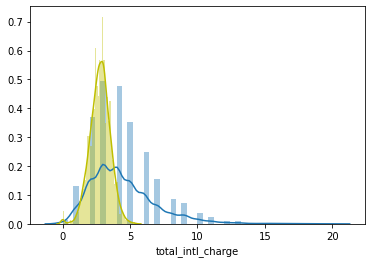

In [12]:
#explore plot and features

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.distplot(df1['total_intl_calls'])
sns.distplot(df1['total_intl_charge'], color = "y")


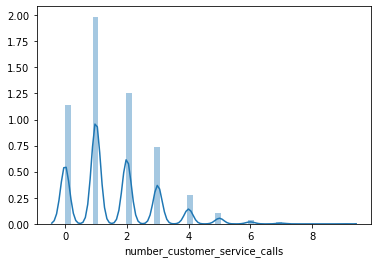

In [13]:
sns.distplot(df1['number_customer_service_calls'])

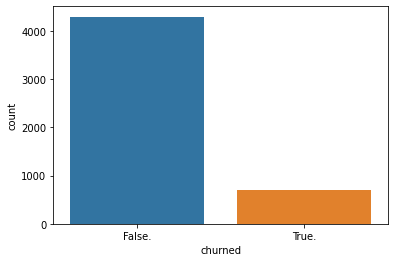

In [14]:
sns.countplot(x="churned", data=df1)

In [0]:
corr = df1[['account_length',		'intl_plan',	'voice_mail_plan',	'number_vmail_messages',
            'total_day_minutes',	'total_day_calls',	'total_day_charge',
            'total_eve_minutes'	,'total_eve_calls'	,'total_eve_charge',	'total_night_minutes',	
            'total_night_calls',	'total_night_charge',	'total_intl_minutes',	'total_intl_calls',	'total_intl_charge',	'number_customer_service_calls']].corr()

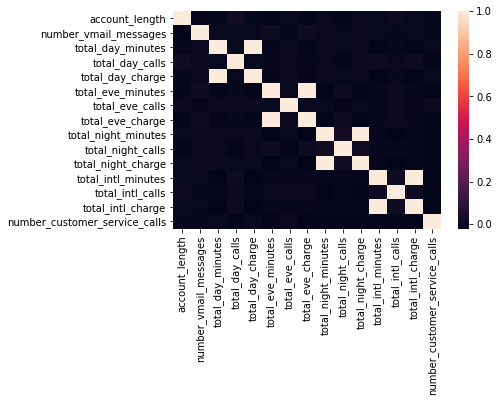

In [16]:
sns.heatmap(corr)

In [17]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655,-0.008533
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.026949,0.000391,-0.000156,0.000368,-0.008283


In [18]:
# calculate two features correlation

from scipy.stats import pearsonr

print(pearsonr(df1['total_day_charge'], df1['total_eve_charge'])[0])
print(pearsonr(df1['total_day_charge'], df1['total_day_calls'])[0])
print(pearsonr(df1['total_intl_minutes'], df1['total_intl_charge'])[0])

-0.010756893054787954
0.0019358843646607006
0.9999926570208357


In [0]:
#Feature processing
y = np.where(df1['churned'] == "True.", 1, 0)

#drop features with high correlation and useless features
to_drop = ['phone_number', 'area_code', 'total_day_minutes', 'total_night_minutes', 'total_intl_minutes', 'churned']
df2 = df1.drop(to_drop, axis = 1)


In [20]:
df2.head()

,state,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,no,yes,25,110,45.07,197.4,99,16.78,91,11.01,3,2.70,1
1,OH,107,no,yes,26,123,27.47,195.5,103,16.62,103,11.45,3,3.70,1
2,NJ,137,no,no,0,114,41.38,121.2,110,10.30,104,7.32,5,3.29,0
3,OH,84,yes,no,0,71,50.90,61.9,88,5.26,89,8.86,7,1.78,2
4,OK,75,yes,no,0,113,28.34,148.3,122,12.61,121,8.41,3,2.73,3


In [0]:
# convert yes and no to boolean
boolean_col = ['intl_plan',	'voice_mail_plan']
df2[boolean_col] = df2[boolean_col] == 'yes'

In [22]:
# check the propotion of y = 1
print(y.sum()/ y.shape * 100)

[14.14]


In [0]:
#One hot encoding
newdf = pd.get_dummies(df2, columns = ['state'])

In [24]:
newdf.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,110,45.07,197.4,99,16.78,91,11.01,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,123,27.47,195.5,103,16.62,103,11.45,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,114,41.38,121.2,110,10.30,104,7.32,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,71,50.90,61.9,88,5.26,89,8.86,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,113,28.34,148.3,122,12.61,121,8.41,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = newdf

In [26]:
# Model Training and selection

#1. split data  into training and testing
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.20)

print("training data has " + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print("test data has " + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 4000 observation with 65 features
test data has 1000 observation with 65 features


In [0]:
#Scale the data using standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#Build Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

log_clas = LogisticRegression(random_state= 9764)
KNN_clas = KNeighborsClassifier()
RF_clas = RandomForestClassifier()

In [29]:
log_clas.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9764, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
log_clas.score(X_test, y_test)

0.869

In [31]:
#using 5-fold cross validation to get the accuracy for different models
models_name = ['Logistic', "KNN", "Random Forest"]
model_list = [log_clas, KNN_clas, RF_clas]
cnt = 0

for classifier in model_list:
  cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv = 5)
  print(cv_score)
  print("Model accuracy of " + models_name[cnt] + ' is ' + str(cv_score.mean()))
  cnt += 1

[0.87125 0.86375 0.8575  0.8725  0.8575 ]
Model accuracy of Logistic is 0.8644999999999999
[0.86375 0.85625 0.86375 0.85375 0.8575 ]
Model accuracy of KNN is 0.859
[0.94625 0.93625 0.9425  0.945   0.925  ]
Model accuracy of Random Forest is 0.9390000000000001


In [32]:
# using SVM model
from sklearn.svm import SVC

SVM_clas = SVC()
cv_score = model_selection.cross_val_score(classifier, X_train,y_train, cv = 5)
print(cv_score)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))

[0.95    0.945   0.945   0.94375 0.93125]
Model accuracy of SVM is: 0.943


In [0]:
# using grid search to find optimal hyperparameters

from sklearn.model_selection import GridSearchCV

def print_result(grid):
  print("Best score " + str(grid.best_score_))
  print("best parameters set: ")
  best_parameters = grid.best_params_
  for name in sorted(parameters.keys()):
    print(name + ":" + str(best_parameters[name]))


In [63]:
# for logistic regression

parameters = {
    'penalty' : ("l1", "l2"),
    'C': (0.0001,0.01,0.5,1,5,9)
}

Grid_LR = GridSearchCV(LogisticRegression(), parameters, cv = 5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.0001, 0.01, 0.5, 1, 5, 9),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
print_result(Grid_LR)

Best score 0.86525
best parameters set: 
C:0.5
penalty:l2


In [0]:
best_LR_model = Grid_LR.best_estimator_

In [66]:
best_LR_model

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Find optimal hyperparameter of KNN
parameters = {
    "n_neighbors" : [3,5,7,9,13]
}

Grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print_result(Grid_KNN)

Best score 0.8622500000000001
best parameters set: 
n_neighbors:9


In [0]:
best_KNN_model = Grid_KNN.best_estimator_

In [39]:
#For random Forest

parameters = {
    'n_estimators': [40, 60, 80, 100],
    'max_features': ['auto','sqrt', 20],
    "criterion":['gini', 'entropy'],
    "min_samples_split":[3,6,9]
}

Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [40]:
print_result(Grid_RF)

Best score 0.9585000000000001
best parameters set: 
criterion:entropy
max_features:20
min_samples_split:6
n_estimators:80


In [0]:
best_RF_model = Grid_RF.best_estimator_

In [0]:
#Build Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

def model_evaluation(classifier, con_matrix):
  tp = con_matrix[1][1]
  tn = con_matrix[0][0]
  fp = con_matrix[0][1]
  fn = con_matrix[1][0]

  accuracy = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall = tp/(tp + fn)

  print("classifier: ", classifier)
  print("Accuracy is: ", accuracy, "\n", "precision is: ", precision, '\n', "recall is: ", recall)

In [0]:
# print out confusion matrix
def print_confusion_matrix(cm):
  class_name = ["Not churned", "Churned"]
  for con_matrix in cm:
    classifier, con_matrix = con_matrix[0], con_matrix[1]
    model_evaluation(classifier, con_matrix)
    fig = plt.figure()
    ax = fig.add_subplot()
    colored = ax.matshow(con_matrix, cmap = plt.get_cmap('mako'))
    plt.title('Confusion Matrix for '+ classifier)
    fig.colorbar(colored)
    ax.set_xticklabels([''] + class_name)
    ax.set_yticklabels([''] + class_name)
    plt.xlabel("predicted")
    plt.ylabel("True")
    plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 60
classifier:  Random Forest
Accuracy is:  0.959 
 precision is:  0.9454545454545454 
 recall is:  0.7482014388489209


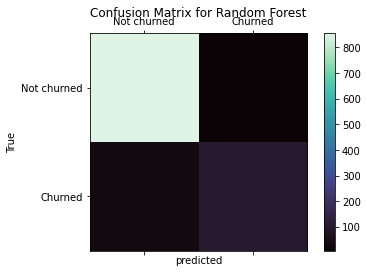

classifier:  Logistic regression
Accuracy is:  0.869 
 precision is:  0.58 
 recall is:  0.20863309352517986


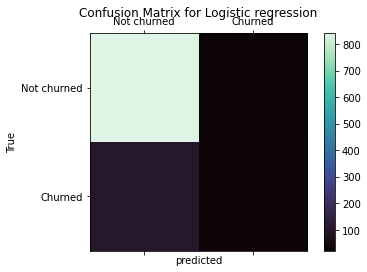

classifier:  KNN Regression
Accuracy is:  0.863 
 precision is:  0.6 
 recall is:  0.04316546762589928


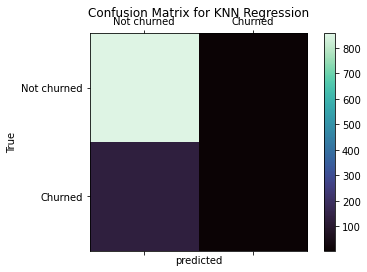

In [67]:
%matplotlib inline

#now print accuracy for those classifiers

classifiers = [("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test))),
                ("Logistic regression", confusion_matrix(y_test, best_LR_model.predict(X_test))),
               ("KNN Regression", confusion_matrix(y_test, best_KNN_model.predict(X_test)))]


print_confusion_matrix(classifiers)

In [0]:
#Check ROC & AUC score
from sklearn import metrics
from sklearn.metrics import roc_curve

RF_ypred = best_RF_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, RF_ypred)

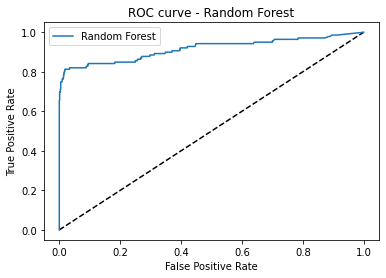

In [76]:
plt.figure()
plt.plot([0,1], [0,1], 'k--')
plt.plot(rf_fpr, rf_tpr, label = "Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('ROC curve - Random Forest')
plt.legend(loc = "best")
plt.show()

In [77]:
#AUC Score of Random Forest
metrics.auc(rf_fpr, rf_tpr)

0.9161924815548258

In [0]:
# ROC of KNN 
KNN_ypred = best_KNN_model.predict_proba(X_test)[:, 1]
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_ypred)

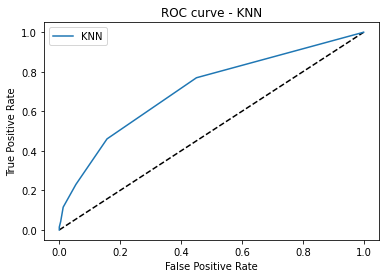

In [86]:
plt.figure()
plt.plot([0,1], [0,1], 'k--')
plt.plot(KNN_fpr, KNN_tpr, label = "KNN")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('ROC curve - KNN')
plt.legend(loc = "best")
plt.show()

In [87]:
metrics.auc(KNN_fpr, KNN_tpr)

0.7101621838417767

In [0]:
# ROC of Logistic Regression

y_pred_lr = best_LR_model.predict_proba(X_test)[:,1]
LR_fpr, LR_tpr, _ = roc_curve(y_test, y_pred_lr)

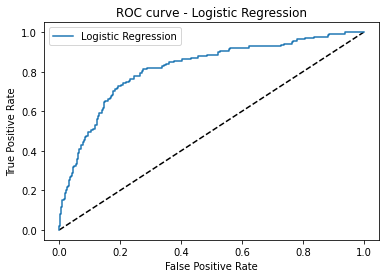

In [80]:
plt.figure()
plt.plot([0,1], [0,1], 'k--')
plt.plot(LR_fpr, LR_tpr, label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('ROC curve - Logistic Regression')
plt.legend(loc = "best")
plt.show()

In [81]:
# AUC score of LR
metrics.auc(LR_fpr, LR_tpr)

0.817177616791584

In [91]:
# After first round training, we can do some feature selection
# The features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
LRmodel = LogisticRegression(C = 0.5)
LRmodel.fit(X_l1, y)
LRmodel.coef_[0]
print("Logistic Regression with L1 norm coefficients are: ")
for i, j in sorted(zip(map(lambda x: round(x,4), LRmodel.coef_[0]),\
                       X.columns), key = lambda i_j:(-abs(i_j[0]), i_j[1])):
  if abs(i) > 0.1:
    print(j + ": " + str(i))

Logistic Regression with L1 norm coefficients are: 
voice_mail_plan: -0.8516
total_day_charge: 0.7464
number_customer_service_calls: 0.6887
intl_plan: 0.6481
number_vmail_messages: 0.382
total_intl_charge: 0.247
total_night_charge: 0.2117
state_VA: -0.1924
total_eve_charge: 0.1871
total_eve_minutes: 0.187
total_intl_calls: -0.1687
state_RI: -0.1544
state_MT: 0.1469
state_CA: 0.1241
state_WA: 0.1187
state_HI: -0.1168
state_IL: -0.1037
state_NJ: 0.1013
state_VT: -0.1004


In [94]:
# For random forest model -- feature importance

RF_clas.fit(X,y)

importance = RF_clas.feature_importances_
print("feature importance ranking by random forest is: ")
for i, j in sorted(zip(map(lambda x:round(x, 4), importance), X.columns), reverse = True):
  if i > 0.02:
    print(j + ":" + str(i))

feature importance ranking by random forest is: 
total_day_charge:0.23
number_customer_service_calls:0.1045
intl_plan:0.0747
total_intl_charge:0.0617
total_eve_minutes:0.0615
total_eve_charge:0.0612
total_night_charge:0.0519
total_intl_calls:0.0496
account_length:0.0432
total_day_calls:0.0426
total_eve_calls:0.0403
total_night_calls:0.0387
number_vmail_messages:0.0244
